# Introduction

This project applies deep learning to classify chest X-ray images into two categories: **Normal** and **Pneumonia**. We use the **VGG16 architecture** with **transfer learning**, fine-tuned for binary classification on a medical imaging dataset.
You can download and use the trained model here:
[vgg16-chest-diagnosis-model](https://www.kaggle.com/models/rahimak/vgg16-pneumonia-model)

---

##  Dataset Overview

Dataset: [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

Directory structure:
- `train/`: Training data
- `val/`: Validation data
- `test/`: Testing data

We use `ImageDataGenerator` to:
- Rescale images to `[0, 1]`
- Resize to `224x224` (to match VGG16 input)
- Load class labels from folder names

---

##  Model Architecture

We use **VGG16** pretrained on ImageNet and add custom layers:

- `Flatten` : A Flatten layer to convert the features into a one-dimensional array.
- `Dropout(0.5)` : A Dropout layer to reduce overfitting.
- `Dense(128, activation='relu')` : A Dense layer with 128 units and ReLU activation.
- `Dense(1, activation='sigmoid')` : A final Dense layer with a single unit and sigmoid activation for binary classification.

### Compilation

- **Optimizer**: Adam (`learning_rate = 1e-4`)
- **Loss**: Binary Crossentropy
- **Metric**: Accuracy

---

##  Training

- **Epochs**: 5  
- **Input size**: 224 × 224  
- **Batch size**: Default  
- **Validation used**: `val/` folder (6 NORMAL, 8 PNEUMONIA images)

Training and validation accuracy were tracked to monitor learning.


# Import necessary libraries 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


2025-07-10 09:25:54.800619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752139555.150578      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752139555.254848      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load and preprocess image data

In [2]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary')
val_data = val_gen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary')
test_data = test_gen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary', shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])


I0000 00:00:1752139581.179348      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752139581.179988      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Model Training

In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(train_data, epochs=5, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1752139587.636369      82 service.cc:148] XLA service 0x798f7c00ed90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752139587.638658      82 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752139587.638681      82 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752139588.146463      82 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/163 ━━━━━━━━━━━━━━━━━━━━ 40:18 15s/step - accuracy: 0.6562 - loss: 0.6367

I0000 00:00:1752139599.912932      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 552ms/step - accuracy: 0.9024 - loss: 0.2285 - val_accuracy: 0.6875 - val_loss: 0.6080
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 51s 313ms/step - accuracy: 0.9737 - loss: 0.0685 - val_accuracy: 0.8750 - val_loss: 0.2424
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - accuracy: 0.9849 - loss: 0.0446 - val_accuracy: 0.8750 - val_loss: 0.2323
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 51s 310ms/step - accuracy: 0.9784 - loss: 0.0532 - val_accuracy: 0.8125 - val_loss: 0.6312
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.9861 - loss: 0.0378 - val_accuracy: 0.9375 - val_loss: 0.1414




#  Evaluation Results (Test Set)

 `Test Accuracy`: **around 75-79%**


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.7170 - loss: 1.1362
Test Accuracy: 0.8397


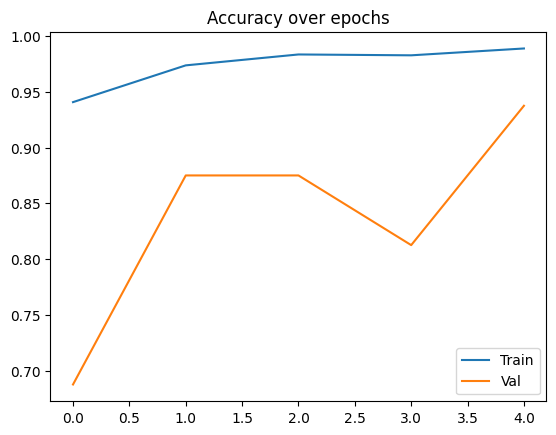

In [6]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step
              precision    recall  f1-score   support

      NORMAL       0.99      0.58      0.73       234
   PNEUMONIA       0.80      0.99      0.89       390

    accuracy                           0.84       624
   macro avg       0.89      0.79      0.81       624
weighted avg       0.87      0.84      0.83       624



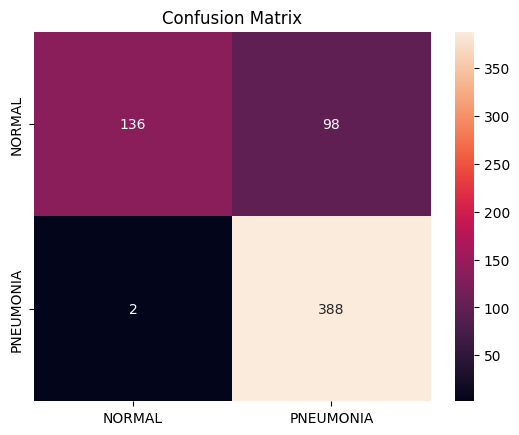

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = model.predict(test_data)
pred_labels = (predictions > 0.5).astype(int)
true_labels = test_data.classes

print(classification_report(true_labels, pred_labels, target_names=['NORMAL', 'PNEUMONIA']))

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title("Confusion Matrix")
plt.show()


# PREDICTIONS 

## predictions/visualizations on `TEST` set

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


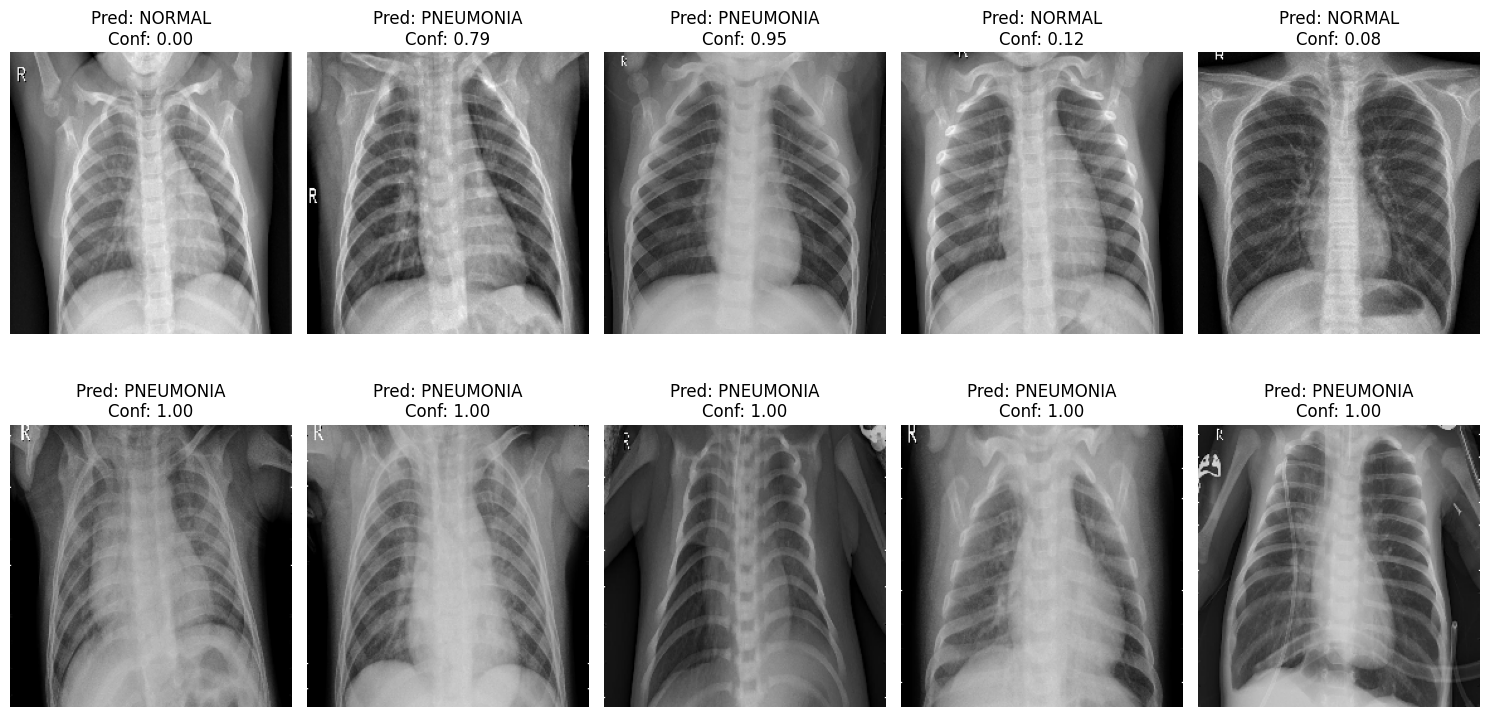

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

class_names = ['NORMAL', 'PNEUMONIA']

test_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  
    pred = model.predict(img_array)[0][0]
    label = class_names[int(pred > 0.5)]
    return label, pred

import random
num_images = 10
normal_images = os.listdir(os.path.join(test_path, 'NORMAL'))
pneumonia_images = os.listdir(os.path.join(test_path, 'PNEUMONIA'))

sample_normal = random.sample(normal_images, num_images // 2)
sample_pneumonia = random.sample(pneumonia_images, num_images // 2)
test_images = sample_normal + sample_pneumonia

plt.figure(figsize=(15, 8))
for i, img_name in enumerate(test_images):
    subfolder = 'NORMAL' if img_name in sample_normal else 'PNEUMONIA'
    img_path = os.path.join(test_path, subfolder, img_name)

    predicted_label, confidence = predict_image(img_path, model)

    plt.subplot(2, 5, i + 1)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {predicted_label}\nConf: {confidence:.2f}")
plt.tight_layout()
plt.show()


### predictions/visulaizations on `3 random images` from `val/Normal` folder

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


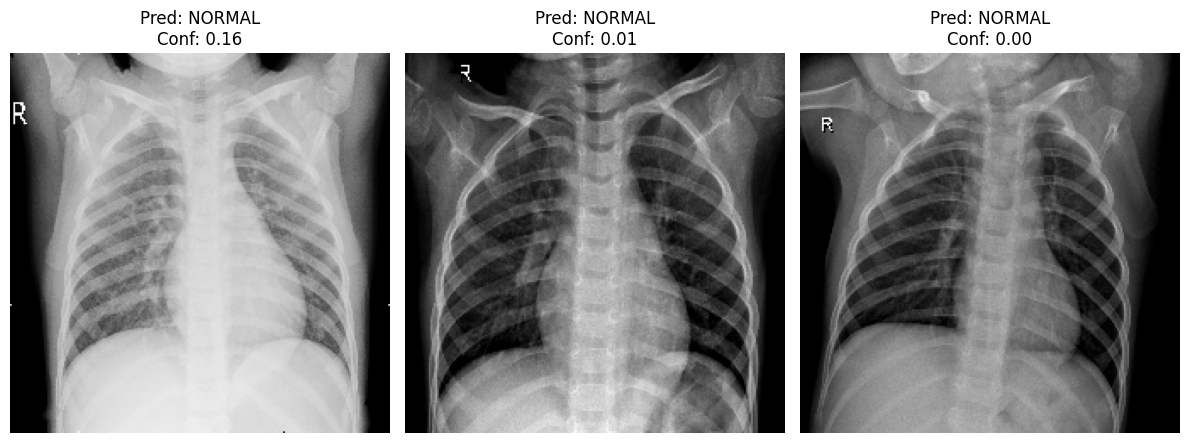

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

val_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL'
image_files = os.listdir(val_normal_dir)

selected_images = image_files[:3]

class_names = ['NORMAL', 'PNEUMONIA']

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    predicted_class = class_names[int(prediction > 0.5)]
    return predicted_class, prediction, img

plt.figure(figsize=(12, 5))

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(val_normal_dir, img_name)
    pred_label, confidence, img = predict_image(img_path, model)

    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {pred_label}\nConf: {confidence:.2f}")

plt.tight_layout()
plt.show()


## predictions/visulaizations on `3 random images` from `val/Pneumonia` folder

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


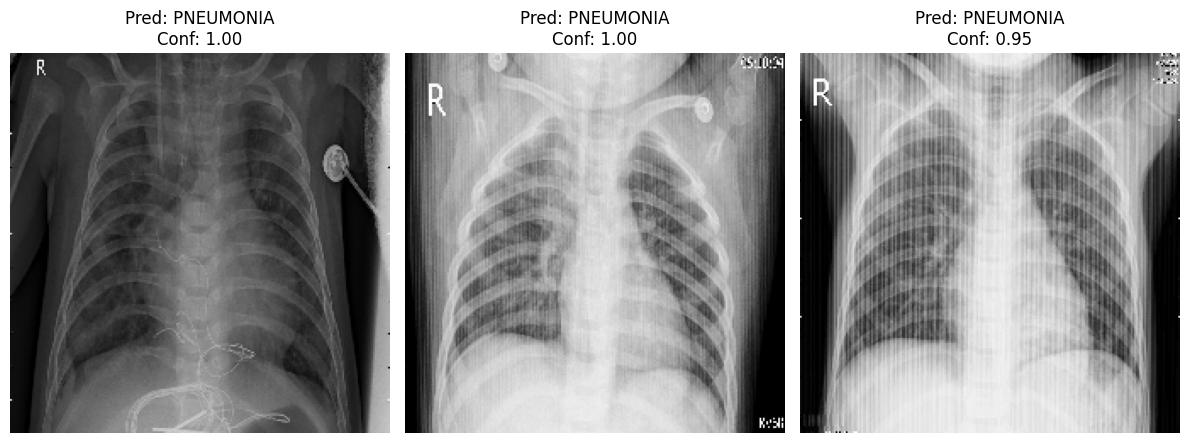

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

val_normal_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
image_files = os.listdir(val_normal_dir)

selected_images = image_files[:3]

class_names = ['NORMAL', 'PNEUMONIA']

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    predicted_class = class_names[int(prediction > 0.5)]
    return predicted_class, prediction, img

plt.figure(figsize=(12, 5))

for i, img_name in enumerate(selected_images):
    img_path = os.path.join(val_normal_dir, img_name)
    pred_label, confidence, img = predict_image(img_path, model)

    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Pred: {pred_label}\nConf: {confidence:.2f}")

plt.tight_layout()
plt.show()


## predictions/visualizations on `giving any image as input for val/` folder

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: NORMAL
Confidence score: 0.0045


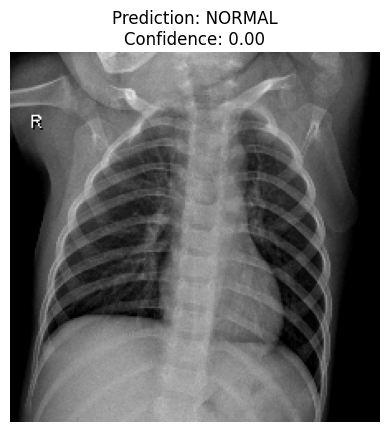

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

class_names = ['NORMAL', 'PNEUMONIA']

def predict_single_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    predicted_class = class_names[int(prediction > 0.5)]

    print(f"Predicted class: {predicted_class}")
    print(f"Confidence score: {prediction:.4f}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class}\nConfidence: {prediction:.2f}")
    plt.show()
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg"
predict_single_image(img_path, model)


## Predictions on complete `validation set` containing both `pneumonia/` and `normal/`

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.preprocessing import image

class_names = ['NORMAL', 'PNEUMONIA']
val_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

def get_predictions_for_class(class_name):
    class_dir = os.path.join(val_path, class_name)
    image_files = os.listdir(class_dir)
    
    predictions = []
    for img_name in image_files:
        img_path = os.path.join(class_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_array)[0][0]
        predicted_label = class_names[int(pred > 0.5)]

        predictions.append((img, pred, predicted_label, img_name))
    return predictions

normal_preds = get_predictions_for_class('NORMAL')
pneumonia_preds = get_predictions_for_class('PNEUMONIA')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


#### Visualization of `Normal` Class from ` val/`

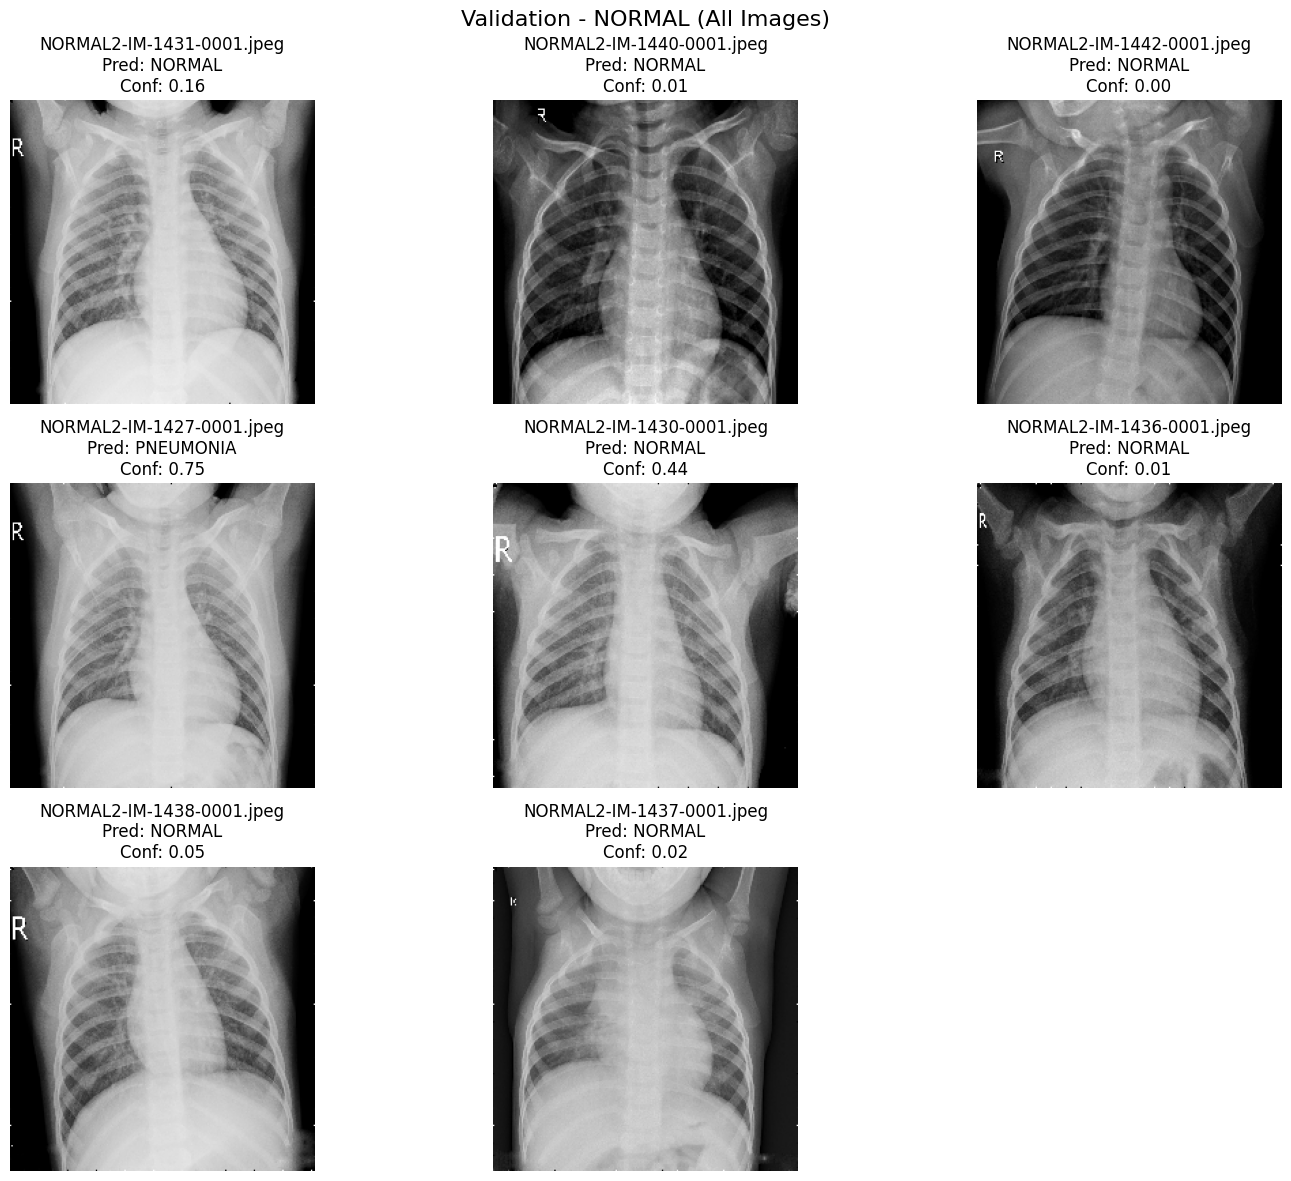

In [13]:
num_normal = len(normal_preds)
cols = 3
rows = math.ceil(num_normal / cols)

plt.figure(figsize=(cols * 5, rows * 4))
for i, (img, conf, pred_label, img_name) in enumerate(normal_preds):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_name}\nPred: {pred_label}\nConf: {conf:.2f}")
plt.suptitle("Validation - NORMAL (All Images)", fontsize=16)
plt.tight_layout()
plt.show()


#### Visualization of `Pneumonia` Class from ` val/`

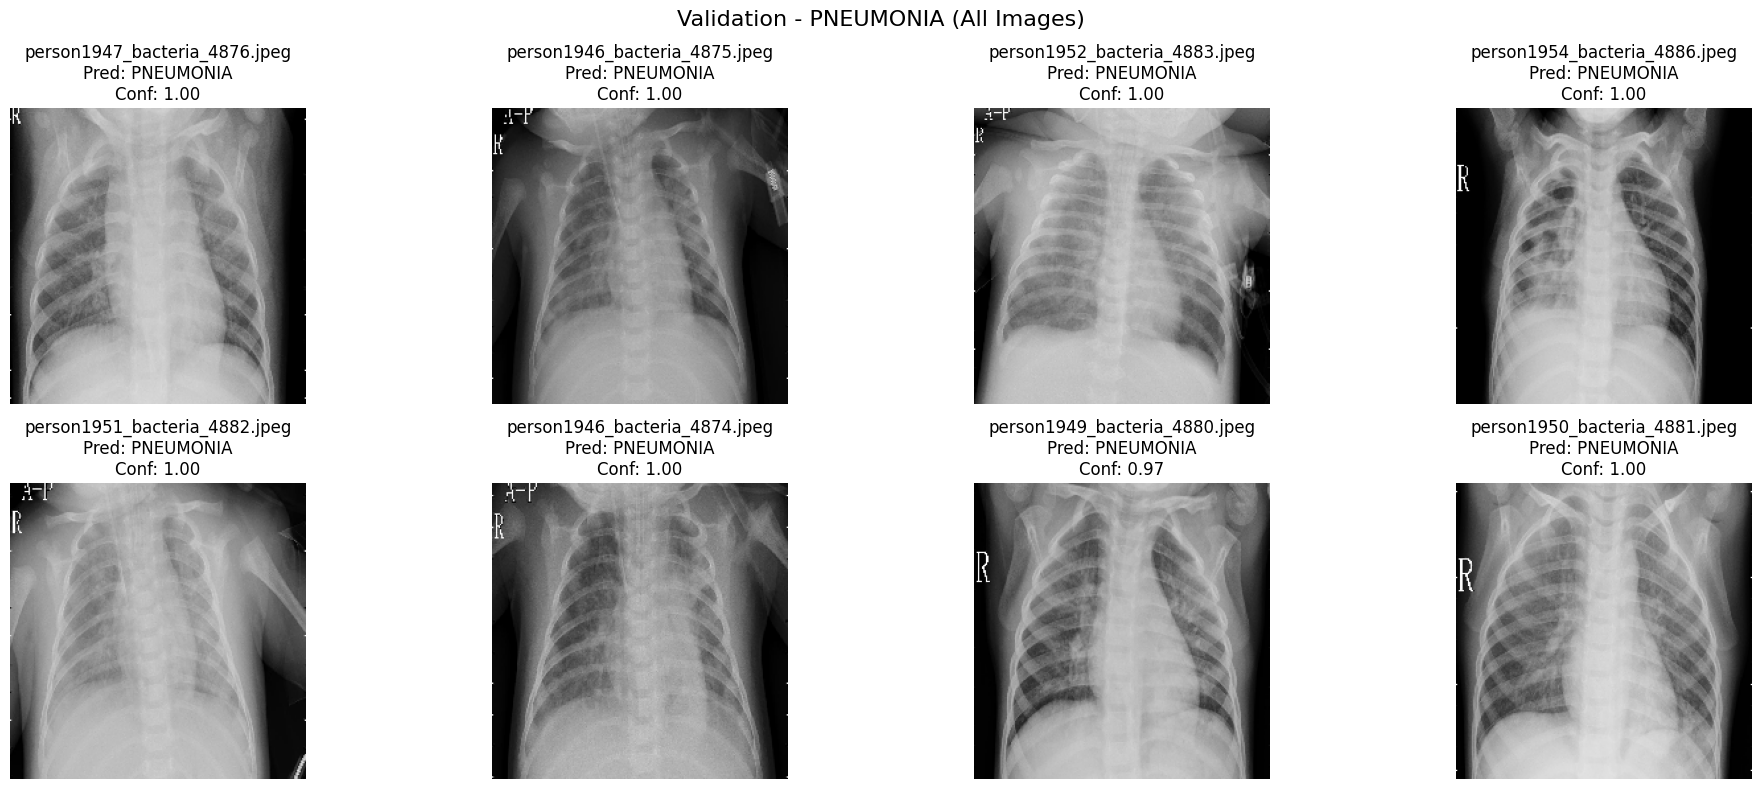

In [14]:
num_pneumonia = len(pneumonia_preds)
cols = 4
rows = math.ceil(num_pneumonia / cols)

plt.figure(figsize=(cols * 5, rows * 4))
for i, (img, conf, pred_label, img_name) in enumerate(pneumonia_preds):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{img_name}\nPred: {pred_label}\nConf: {conf:.2f}")
plt.suptitle("Validation - PNEUMONIA (All Images)", fontsize=16)
plt.tight_layout()
plt.show()


In [15]:
model.save('vgg16_pneumonia_model.h5')
